Amir Hosein Karami 99222086 \\
Assignment 4

# Initial activities

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install torchvision
!kaggle competitions download -c cifar-10
!unzip /content/cifar-10.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 98% 702M/715M [00:07<00:00, 144MB/s]
100% 715M/715M [00:07<00:00, 97.7MB/s]
Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [4]:
!sudo apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [5]:
!7za x /content/train.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% 710 - train/10637.png                            2% 1220 - train/11096.png                             2% 1586 - train/11425.png                             4% 1868 - train/1168.png                            6% 1869 - train/11680.png

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from PIL import Image
import imageio
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torchvision as v
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from tqdm import tqdm


# Dataset generation

Creating labels data frame and the directoty of the generated images

In [8]:
labels_dataframe = pd.DataFrame (columns = ['first_image', 'second_image', 'result_image'])

if not os.path.isdir ('/content/Cifar_generated_dataset') :
  os.mkdir('/content/Cifar_generated_dataset')




A class to generate images and create a csv file for mapping each image to the two images which have generated that.

In [9]:
def dataset_generator (data_path, generation_path, csv_destination) :


  # print(generation_path)
  # train_path = os.path.join(generation_path, 'train')
  # print(train_path)
  # test_path = os.path.join(generation_path, 'test')

  # if not os.path.isdir (train_path) :
  #   os.mkdir(train_path)
  # if not os.path.isdir (test_path) :
  #   os.mkdir(test_path)


  # train_csv_dest = os.path.join(csv_destination , 'Cifar_generated_dataset_train.csv')
  # test_csv_dest = os.path.join(csv_destination , 'Cifar_generated_dataset_test.csv')
  images = []
  image_names = []

  for i in sorted(os.listdir(data_path)) :
    images.append(imageio.imread(os.path.join('/content/train', i)))
    image_names.append(i)

  for i in tqdm(range(10)):
    # if i < 8 :
    #   image_path = train_path
    #   df = train_dataframe
    # else :
    #   image_path = test_path
    #   df = test_dataframe

    for k in ((range(100*i,(100)*(i+1)))):
      for j in range(k,100*(i+1)):
        generated_im = (images[k] + images[j]) / 2
        generated_im.astype(int)
        generated_im = Image.fromarray (generated_im.astype(np.uint8))
        generated_im_name = '{}_{}.jpg'.format(image_names[k].split('.')[0], image_names[j].split('.')[0])
        # print(image_path)
        generated_im.save(os.path.join(generation_path, generated_im_name))
        labels_dataframe.loc[len(labels_dataframe.index)] = [image_names[k], image_names[j], generated_im_name]

  labels_dataframe.to_csv(csv_destination)
  return images

In [10]:
dataset_generator('/content/train', '/content/Cifar_generated_dataset', '/content/Cifar_generated_dataset.csv')

100%|██████████| 10/10 [03:02<00:00, 18.26s/it]


[Array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

# Data loading

A class which generates the list of generated and initial images.

In [11]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import pandas as pd
import torchvision
import os
from torchvision import transforms
from torchvision import transforms, utils

root_directory = '/content/'

class ImageDataset(Dataset):

    def __init__(self , images_path, labels_path ,transform=None):
        self.labels_path = pd.read_csv(labels_path)
        self.images_path = images_path
        self.transform = transform

    def __len__(self):
        return len(self.labels_path.index)

    def __getitem__(self , index):
        # print(self.labels_path.iloc[index,3])
        image_path = os.path.join(self.images_path, str(self.labels_path.iloc[index,3]))
        image = read_image(image_path)
        image_label_1 =read_image(os.path.join('/content/train',str(self.labels_path.iloc[index,1])))
        image_label_2 =read_image(os.path.join('/content/train',str(self.labels_path.iloc[index,2])))

        # image = torch.from_numpy(image)
        # image_label_1 = torch.from_numpy(image_label_1)
        # image_label_2 = torch.from_numpy(image_label_2)
        transform1 = transforms.Compose([transforms.ToPILImage()])
        image = transform1(image)
        image_label_1 = transform1(image_label_1)
        image_label_2 = transform1(image_label_2)
        

        if self.transform != None :
          image = self.transform(image)
          image_label_1 = self.transform(image_label_1)
          image_label_2 = self.transform(image_label_2)
        labels_concat = torch.cat((image_label_1, image_label_2), 1)
        # return image , c
        return image , labels_concat

Loading data and splitting into train and test set with the ratio 80:20 (Dataset contains 50500 data instances)

In [12]:
from torch.utils.data.dataloader import DataLoader
composed = transforms.Compose([transforms.Resize(32),
  #  transforms.CenterCrop(15),
   transforms.ToTensor(),
  #  transforms.Normalize(
      #  mean=[0.485, 0.456, 0.406],
      #  std=[0.229, 0.224, 0.225]
  #  )]
])


dataset = ImageDataset ('/content/Cifar_generated_dataset', '/content/Cifar_generated_dataset.csv', composed)

trainset , testset = torch.utils.data.random_split(dataset, [40400, 10100])

trainloader = DataLoader(trainset, batch_size = 32, shuffle = True)
testloader = DataLoader(testset, batch_size = 32, shuffle = True)


# Run function

In [39]:
def runner(given_model, optimizer, lr_scheduler, n_epochs):
  train_losses, test_losses = [], []
  i, j = 0, 0

  for epoch in range(n_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
      # i += 1
      # print('i', end = ' ')
      images = images.to(device)
      labels = labels.to(device)
      # images = images.view(images.shape[0], -1)
      
      optimizer.zero_grad()
      
      output = given_model(images)
      output1 = output[:,3:,:,:]
      output2 = output[:,:3,:,:]
      # print(output1.shape)
      # print(labels[:,:,32:,:].shape)
      # print(output2.shape)

      loss1 = criterion(output1, labels[:,:,32:,:].float())
      loss2 = criterion(output2, labels[:,:,:32,:].float())

      loss = loss1 + loss2
      loss.backward()
      optimizer.step()
      
      running_loss += loss.item()
    else:
      test_loss = 0.0
      # accuracy = 0
      
      with torch.no_grad():
        given_model.eval()
        
        for images, labels in testloader:

          # j += 1
          # print('j', end = ' ')
          images = images.to(device)
          labels = labels.to(device)

          # images = images.view(images.shape[0], -1)

          output = given_model(images)
          output1 = output[:,3:,:,:]
          output2 = output[:,:3,:,:]

          loss1 = criterion(output1, labels[:,:,32:,:].float())
          loss2 = criterion(output2, labels[:,:,:32,:].float())

          loss = loss1 + loss2

          
          test_loss += loss.item()
          
          # ps = torch.exp(log_ps)
          # top_p, top_class = ps.topk(1, dim = 1)
          # equals = top_class == labels.view(*top_class.shape)
          # accuracy += torch.mean(equals.type(torch.FloatTensor))
          # accuracy += torch.mean(equals.type(torch.cuda.FloatTensor))

      
      given_model.train()

      avg_train_loss = running_loss/len(trainloader)
      avg_test_loss = test_loss/len(testloader)
      train_losses.append(avg_train_loss)
      test_losses.append(avg_test_loss)
      
      lr_scheduler.step(avg_test_loss)

      print("Epoch: {}..".format(epoch + 1),
            "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
            "Test loss: {:.3f}..".format(test_loss/len(testloader)))
  return [train_losses, test_losses]

# Model

In [47]:
from torch import nn

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        # #Encoder
        # self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        # self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        # self.conv4 = nn.Conv2d(32, 64, 3, padding=1)

        self.enc = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.LeakyReLU(),
            nn.Conv2d(16, 32, 3, padding=1), nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 32, 5, padding=2), nn.LeakyReLU(),
            nn.Conv2d(32, 64, 5, padding=2), nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.dec = nn.Sequential (
            nn.ConvTranspose2d(64, 32, 2, stride=2, padding=0), nn.LeakyReLU(),
            nn.Conv2d(32, 32, 5, padding=2), nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 16, 5, stride=1, padding=2), nn.LeakyReLU(),
            nn.Conv2d(16, 16, 5, padding=2), nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 16, 2, stride=2, padding=0), nn.LeakyReLU(),
            nn.Conv2d(16, 16, 3, padding=1), nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 3, 5, stride=1, padding=2), nn.LeakyReLU(),
            nn.Conv2d(3, 6, 3, padding=1), nn.Sigmoid()
        )


        # self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        # self.t_conv1 = nn.ConvTranspose2d(64, 128, 2, stride=2)
        # self.t_conv2 = nn.ConvTranspose2d(128, 6, 2, stride=1)
        # self.t_conv1 = nn.ConvTranspose2d(64, 32, 2, stride=1)
        # self.t_conv2 = nn.ConvTranspose2d(32, 32, 2, stride=2)
        # self.t_conv3 = nn.ConvTranspose2d(32, 16, 2, stride=2)
        # self.t_conv4 = nn.ConvTranspose2d(16, 3, 2, stride=1)


    def forward(self, x):
      encoded = self.enc(x)
      # print (x.shape)
      decoded = self.dec(encoded)
      # print (decoded.shape)
      return decoded

        # x = F.relu(self.conv1(x))
        # x = F.relu(self.conv2(x))
        # x = self.pool(x)
        # x = F.relu(self.conv3(x))
        # x = F.relu(self.conv4(x))
        # x = self.pool(x)
        
        # # print (x.shape)
        # x = F.relu(self.t_conv1(x))
        # x = F.relu(self.t_conv2(x))
        # x = F.relu(self.t_conv3(x))
        # x = F.relu(self.t_conv4(x))
        # # x = F.relu(self.t_conv5(x))
        
        # return x

The encoder contains a set of convolution layers followed by a set of linear layers.

In [41]:
class Encoder (nn.Module) :
  def __init__ (self,
                in_channels : int,
                base_channels : int,
                latent_dim : int,
                activation_func : object = nn.LeakyReLU) :

    super().__init__()
    
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels, base_channels, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(base_channels),
        activation_func(),
        nn.Conv2d(base_channels, base_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(base_channels),
        activation_func(),
        nn.Conv2d(base_channels, 2*base_channels, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(2*base_channels),
        activation_func(),
        nn.Conv2d(2*base_channels, 2*base_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(2*base_channels),
        activation_func(),
        nn.Conv2d(2*base_channels, 2*base_channels, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(2*base_channels),
        activation_func(),
        nn.Flatten()
    )

    self.linear = nn.Sequential(
        nn.Linear(2*16*base_channels, latent_dim),
        nn.BatchNorm1d(latent_dim),
        activation_func(),
        nn.Linear(latent_dim, 32),
        nn.BatchNorm1d(32),
        activation_func(),
        # nn.Linear(16, 8),
        # nn.BatchNorm1d(8),
        # activation_func(),
        # nn.Linear(8, 4),
        # nn.BatchNorm1d(4),
        # activation_func()
    )

  def forward (self, x) :
    conv_out = self.conv(x)
    encoded = self.linear(conv_out)
    return encoded



The decoder contains a set of convolution and transposed convolution layers followed by a set of linear layers.

In [42]:
class Decoder (nn.Module) :
  def __init__(self,
               in_channels : int,
               base_channels : int,
               latent_dim : int,
               activation_func : object = nn.LeakyReLU) :
    super().__init__()

    self.linear = nn.Sequential(
        # nn.Linear(4, 8),
        # nn.BatchNorm1d(8),
        # activation_func(),
        # nn.Linear(8, 16),
        # nn.BatchNorm1d(16),
        # activation_func(),
        nn.Linear(32, latent_dim),
        nn.BatchNorm1d(latent_dim),
        activation_func(),
        nn.Linear(latent_dim, 2*16*base_channels),
        nn.BatchNorm1d(2*16*base_channels),
        activation_func()
    )

    self.conv = nn.Sequential(
        nn.ConvTranspose2d(2*base_channels, 2*base_channels, kernel_size=3, output_padding=1, padding=1, stride=2), #size doubled
        nn.BatchNorm2d(2*base_channels),
        activation_func(),
        nn.Conv2d(2*base_channels, 2*base_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(2*base_channels),
        activation_func(),
        nn.ConvTranspose2d(2*base_channels, base_channels, kernel_size=3, output_padding=1, padding=1, stride=2), #size doubled
        nn.BatchNorm2d(base_channels),
        activation_func(),
        nn.Conv2d(base_channels, base_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(base_channels),
        activation_func(),
        nn.ConvTranspose2d(base_channels, 2*in_channels, kernel_size=3, output_padding=1, padding=1, stride=2), #size doubled
        nn.Sigmoid()        
    )


  def forward (self, x) :
    linear_out = self.linear(x)
    conv_input = linear_out.reshape(linear_out.shape[0], -1, 4, 4)
    output = self.conv(conv_input)

    return output


The main auto encoder uses the encoder and decoder defined above.

In [43]:
class ConvLinAE (nn.Module) :
  def __init__(self,
               in_channels : int,
               base_channels : int,
               latent_dim : int,
               im_width : int = 32,
               im_height : int = 32) :
    super().__init__()
    self.enc = Encoder(in_channels, base_channels, latent_dim)
    self.dec = Decoder(in_channels, base_channels, latent_dim)
  
  def forward (self, x) :
    encoded = self.enc(x)
    decoded = self.dec(encoded)
    return decoded

# Defining and training the model

defining the model

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

conv_lin_AE = ConvLinAE(3, 32, 64)
criterion = nn.MSELoss()
optimizer = optim.Adam(conv_lin_AE.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)
# optimizer = optim.SGD(conv_lin_AE.parameters(), lr = 0.05, momentum=0.9, weight_decay=0.1)
conv_lin_AE.to(device)

ConvLinAE(
  (enc): Encoder(
    (conv): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.01)
      (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): LeakyReLU(negative_slope=0.01)
      (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (13): BatchNorm2d(64, 

Running the model

In [46]:
conv_lin_AE_res = runner(conv_lin_AE, optimizer, lr_scheduler, 10)

Epoch: 1.. Training loss: 0.115.. Test loss: 0.113..
Epoch: 2.. Training loss: 0.101.. Test loss: 0.098..
Epoch: 3.. Training loss: 0.095.. Test loss: 0.093..
Epoch: 4.. Training loss: 0.092.. Test loss: 0.091..
Epoch: 5.. Training loss: 0.091.. Test loss: 0.092..
Epoch: 6.. Training loss: 0.090.. Test loss: 0.087..
Epoch: 7.. Training loss: 0.088.. Test loss: 0.085..
Epoch: 8.. Training loss: 0.087.. Test loss: 0.085..
Epoch: 9.. Training loss: 0.087.. Test loss: 0.085..
Epoch: 10.. Training loss: 0.086.. Test loss: 0.085..


a plot for results

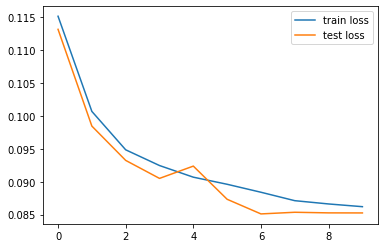

In [49]:
plt.plot(conv_lin_AE_res[0], label= 'train loss')
plt.plot(conv_lin_AE_res[1], label= 'test loss')

plt.legend()